Attention! Before working on this notebook, for the first time, once, open a terminal (`File` > `New` > `Terminal`) and run:
```
$ pip install pytest
```

In [1]:
import pytest

## Assignment 1
***
Read the assignment tasks description carefully! Start as early as possible, questions 24 hours prior to the deadline may not be answered anymore.

Please adhere exactly to the Code of Conduct for every assignment. 

Do NOT use any libraries for your solutions of the tasks, the usage of Python built-in functions is allowed.

Do NOT change the structure of the notebook (e.g. add/remove cells).

Remove the raise of any `NotImplementedError` in your code before submission.

In [2]:
# Please indicate your student id as a string, w/o the leading 'h'!
student_id = "12118279"

### Task 1
***
Implement a function `topBigrams` which returns the 8 most frequent character pairs of adjacent letters in an English text. The function must return a `list` holding the 8 most frequently occurring character pairs in descending order. This function can be used, for example, to optimise the key assignment on a keyboard.

Important:
* You are meant to work on a particular input text available from the supplemental script `corpus.py`.
* `corpus.py`, when loaded, will provide a corpus of 20 candidate texts.
* Work on the text in this corpus identified by a computed position. Your position is computed as the integer obtained from your `student_id` (trim any leading zeroes!) modulo `20` (there are 20 candidate texts in `corpus`, hence this divisor).

Hints:
* The modulo is also known as the residual computation, e.g.: `50 % 10 = 5`.
* In a first step, remove any character other than [A-Z, a-z] from the input string for bigram frequency analysis. 
* When calculating the occurences of character pairs, uppercase letters should be treated the same as lowercase letters.

The corpus.py file shall be omitted in the submitted zip-file.

In [3]:
# Load the list of English texts into a variable called 'corpus'
%run corpus.py

In [4]:
def topBigrams(text):

    filtered_char = []
    for c in text:
        if c.isalpha():
            filtered_char.append(c.lower())
    text = "".join(filtered_char)
      
    bigramdict = {}
    for i in range(len(text)-1):
        bigram = text[i:i+2]
        if bigram not in bigramdict:
            bigramdict[bigram] = 1
        else:
            bigramdict[bigram] += 1

     
    sorted_bigrams= sorted(bigramdict.items(), key=lambda x: x[1], reverse=True)
       
    return [bg for(bg, count) in sorted_bigrams][:8]

In [5]:
text = corpus[(int(student_id.lstrip("h0")) % len(corpus))][0]
assert type(topBigrams(text)) == list
assert len(topBigrams(text)) == 8
assert topBigrams("NotImplementedError") == ['no', 'ot', 'ti', 'im', 'mp', 'pl', 'le', 'em']

In [12]:
# Edit this cell or remove it, and you shall perish, meow! 😼⚡️

# Task 2
***
The following program printout was created using the Blockly visual programming environment. Implement a function `compute(n)` that checks whether an integer `n` is a palindrome. Implement a Python program (function) corresponding exactly to the Blockly one.

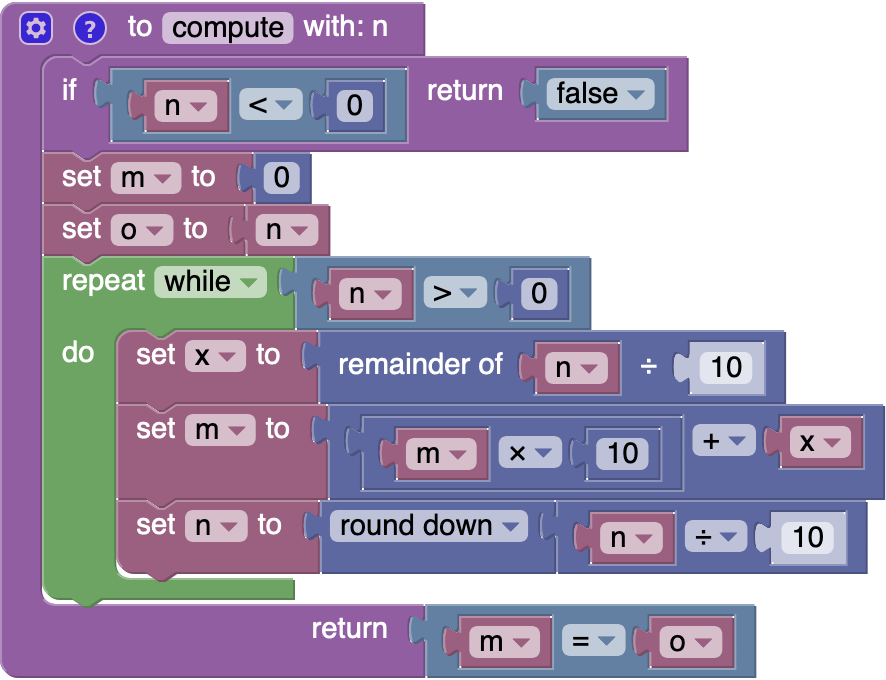

Hints:
* This Blockly program was also featured in the entry exam.
* Mind the importance of precedence of nested terms in Blocky arithmetic expressions.
* You need to handle attempts of providing a non-integer value as an input to `compute()`. Return the string `Wrong input type`. Note: Other then that, try to make an exacty translation from the Blockly code to Python code.

In [6]:
def compute(n):
    if not isinstance(n, int):
        return "Wrong input type"
    elif n < 0:
        return False
    m = 0
    o = n
    while n > 0:
        x = n%10
        m = m*10+x
        n = n//10
    return m == o

In [7]:
assert compute(454)
assert type(compute(123123)) == bool
assert compute(31213)
assert compute("three hundred") == "Wrong input type"

In [15]:
# Edit this cell or remove it, and you shall perish, meow! 😼⚡️

## Task 3 ##
***
You are given a string (containing only characters and whitespaces) to encode according to these rules:

- Every letter in the final encoded string must be lower case.
- Every space in the string must be replaced by the symbols in the `special` dictionary.
- Every 4th character in the string must be a symbol from the `random` list.
- Each letter in the original string must be shifted by the number defined in the `shift` variable after being lowercased.

To clarify what exactly we want you to do, we will look at this string and apply the rules from above:
"This is an example" <br>
**Step 1: "this is an example"** $\;\;\;\;\;\;\;\;\;\;\;\;\;$  <br>   - Lower case letters <br>
**Step 2: "this?is*an#example**  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;$  <br>   - Each whitespace is replaced by the symbols in the `special` dictionary depending on the index. Which means the first occurence of a whitespace should be replaced by the value of the key "1" in the dictionary and so on. After all keys have been iterated over, you start from the beginning. <br>
**Step 3: "thi+s?i-s*a=n#eßxam+ple"** $\;\;\;\;\;\;\;\;$ <br> - Every 4th position within the string contains a symbol from the `random` list. The order of the occuring letters is sequential. <br>
**Step 4: "guv+f?v-f*n=a#rßknz+cyr"** $\;\;\;\;\;\;\;\;\;\;\;$-> <br> - The original lowercase ACSCII letters (`a-z`) in the string are shifted by 13 positions. <br>

_Notes_:

- The symbols in the lists should be used in a circular fashion, i.e. when you reach the last symbol in the list, you start again from the beginning.
- Make sure your code works with lists and dictionaries of varying lengths.
- Your code should also be able to shift characters to the left, otherwise known as a negative shift value.
- The dictionary will always use keys numbered from "1" to "n" (n being the largest occuring number in the dictionary).

In [8]:
special = {"1":"?", "3":"#", "4":"!", "2":"*"}
random = ["+", "-", "=", "ß"]
shift = 13

In [36]:
def encode(data, special, random, shift):
    data = data.lower()
    print(data)
    
    special_keys = sorted(special.keys(), key=int)
    special_i = 0
    new_data = []
    for s in data:
        if s == " ":
            key = special_keys[special_i]
            new_data.append(special[key])
            special_i = (special_i + 1) % len(special)
        else:
            new_data.append(s)
    data = "".join(new_data)
    print(data)        
    
    random_i = 0
    new_data = []
    for i, r in enumerate(data):
        new_data.append(r)
        if (i+1) % 3 == 0 and i + 1 <len(data):
            new_data.append(random[random_i])
            random_i = (random_i + 1) % len(random)
    data = "".join(new_data)
    print(data)   
    
    new_data = []
    for c in data:
        if "a" <= c <= "z":
            old_pos = ord(c) - ord("a")
            new_pos = (old_pos + shift) % 26
            new_data.append(chr(ord("a") + new_pos))
        else:
            new_data.append(c)
    data = "".join(new_data)
    print(data)
    
    return data

In [37]:
assert isinstance(encode("Test", special, random, shift), str), "Test 3.0: Check the output type of your function"

test
test
tes+t
grf+g


In [38]:
assert encode("i want to go home", special, random, shift) == "v?j+nag-*gb=#tbß!ub+zr", "Test 3.1: Check if you follow the rules presented in the bulletpoints"

i want to go home
i?want*to#go!home
i?w+ant-*to=#goß!ho+me
v?j+nag-*gb=#tbß!ub+zr


In [39]:
assert encode("this task is giving me depression", special, random, shift) == "guv+f?g-nfx=*vfß#tv+iva-t!z=r?qßrce+rff-vba", "Test 3.1: Check if you follow the rules presented in the bulletpoints" 

this task is giving me depression
this?task*is#giving!me?depression
thi+s?t-ask=*isß#gi+vin-g!m=e?dßepr+ess-ion
guv+f?g-nfx=*vfß#tv+iva-t!z=r?qßrce+rff-vba


In [26]:
# Edit this cell or remove it, and you shall perish, meow! 😼⚡️

### Task 4
***
Implement a function `stringify`, which takes a dictionary as input and returns the dictionary content as a formatted string. Your function is supposed to take the values from each key within the dictionary and extract the values based on the following rules:

1. If the input is not a dictionary, return the error "Wrong input type"
2. If the value is a string or numeric value, add that value to the string with the delimiter `|` at the start and the end of that value. (e.g., `hello` becomes `|hello|`)
3. If the value is a dictionary, add the character `€` to the string signaling the dictionary start and another `€` to denote the end. (`{"hello": "world"}` becomes `€|world|€`)
4. For every list encountered, add `<` to denote the start and an `>` to denote the end of list.
5. Make sure you also apply rule 4 for any nested lists.

As an example, the following nested list should be converted as such:

`[["hello"]"hi"]` becomes   `<<|hello|>|hi|>`


Hints:

* Use recursion when implementing `stringify` for nested structures (list of dicts, or list of lists)
* Watch closely the assertions below to better understand the requirements of this task.
* Make sure to cover important corner cases, such as empty strings and empty lists.
* Make sure to properly handle dictionaries as dictionary values and list elements.

In [13]:
def stringify(dictionary):
    if not isinstance(dictionary, dict):
        return "Wrong input type"
    
    def stringify_value(value):
        values = ""
        if isinstance(value, (str, int, float)):
            return f'|{value}|' 
        elif isinstance(value, dict):
            for v in value.values():
                values += stringify_value(v)
            return f'€{values}€'
        elif isinstance(value, list):
            for v in value:
                values += stringify_value(v)
            return f'<{values}>'
        return values
    
    values = ""
    for v in dictionary.values():
        values += stringify_value(v)
    return f'€{values}€'

In [14]:
assert stringify({"one": "data"}) == '€|data|€'
assert stringify({"one": ["cooldata"]}) == '€<|cooldata|>€'
assert stringify({"one": ["reallycooldata"], "two": "evencoolerdata"}) == '€<|reallycooldata|>|evencoolerdata|€'
assert stringify({"one": [["right"],"left"]}) == '€<<|right|>|left|>€'
assert stringify({"one": ["recursion",["or"],["no",["recursion"]]]}) == '€<|recursion|<|or|><|no|<|recursion|>>>€'
assert stringify({"one": {"two": "this is my kindgom come"}}) == '€€|this is my kindgom come|€€'

In [24]:
# Edit this cell or remove it, and you shall perish, meow! 😼⚡️

### Task 5
Implement a function `encrypt`, which takes an input string, an identifying character, and an integer value defining the shift key. Your function `encrypt` shifts (either towards left or right) the letters of the alphabet (`A` to `Z`, `a` to `z`).

Important:
* Only encode words which contain a given identifying character in the input string.
* If the identifying character is NOT part of the character range `[a-z]`, encode the word and delete the identifying character.
* Left shifting is indicated by a shift key carrying a minus sign (`-`), otherwise a right shift is performed.
* Characters outside the range of `[a-z]`, incl. numbers and punctuation characters, are always subjected to a left shift of `0`.

For instance, for a right shift of 3 and the identifier `#`, the input string `'syntax error# in line 90'` is encrypted into `'syntax huuru in line 90'`

Hints:
* Initially, transform any uppercase character to their lowercase equivalent.
* Any right/left shifts are only ought the be applied to characters of the character range `[a-z]`.

In [15]:
def encrypt(text, identifier, shift_val):
    splited_text = text.split(" ") 
    encrypted_text = []
    char_map = {'Ü': 'ü'}

    for t in splited_text:
        if identifier in t:
            stripped_text = t.replace(identifier, "") 
            if not stripped_text:
                encrypted_text.append("")
                continue

            shifted_chars = []
            for c in stripped_text:
                if c in char_map:
                    c = char_map[c]
                if 'a' <= c.lower() <= 'z':  
                    shifted_char = chr((ord(c.lower()) - ord('a') + shift_val) % 26 + ord('a'))
                    shifted_chars.append(shifted_char)
                else:
                    shifted_chars.append(c)
            encrypted_text.append("".join(shifted_chars))
        else:
            encrypted_text.append(t)
    
    return " ".join(encrypted_text)

In [16]:
assert type(encrypt("Yes, I will adhere to the Code of Conduct", "o", 5)) == str
assert len(encrypt("Th#is is a very secu#re message", "#", 8)) == 29
assert encrypt("Plea?se ?交? your HAUSÜ?BUNG on time.", "?", 7) == 'wslhzl 交 your ohbzüibun on time.'
assert encrypt('syntax error# in line 90', '#', 3) == 'syntax huuru in line 90'
assert encrypt(' ', '#', 3) == ' '
assert encrypt(' #', '#', 3) == ' '
assert encrypt('', '', 3) == ''
assert encrypt(' ', '', 3) == ' '
assert encrypt(student_id + "#", '#', 3) == student_id

In [ ]:
# Edit this cell or remove it, and you shall perish, meow! 😼⚡️